# Segmentación por umbralización

In [118]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage.filters import threshold_local

# Cargar imagen

In [53]:
objects_image = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

In [54]:
def show_histogram(image, values=256):
  histogram, bin_edges = np.histogram(image, bins=values, range=(0, values-1))
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, values-1])

  ax.plot(bin_edges[0:-1], histogram)
  plt.show()

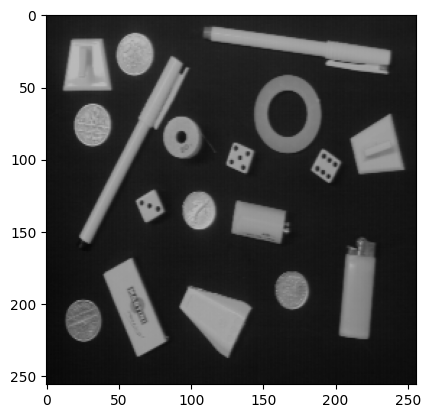

In [55]:
plt.imshow(objects_image, cmap='gray', vmin=0, vmax=255)
plt.show()

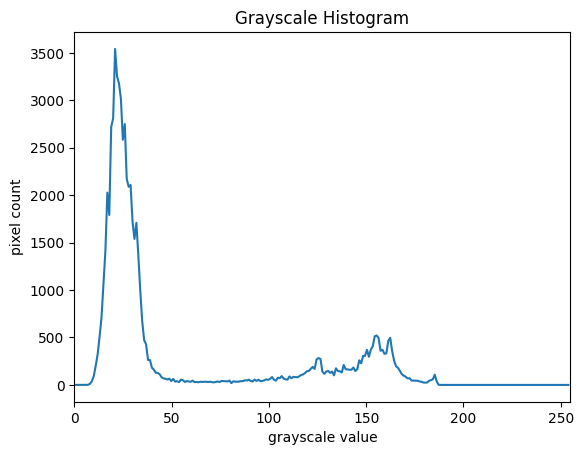

In [56]:
show_histogram(objects_image)

## Umbralización Global - Objects

In [57]:
thres_value_1, thres_image_1 = cv2.threshold(objects_image, 50, 255,cv2.THRESH_BINARY)

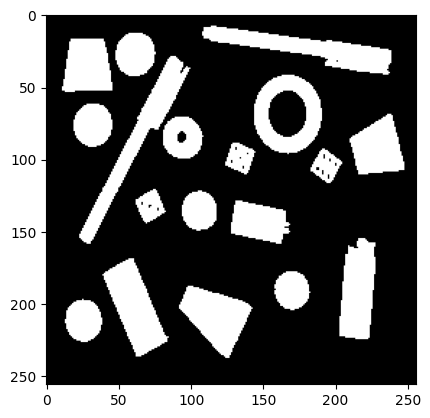

In [58]:
plt.imshow(thres_image_1, cmap='gray', vmin=0, vmax=255)

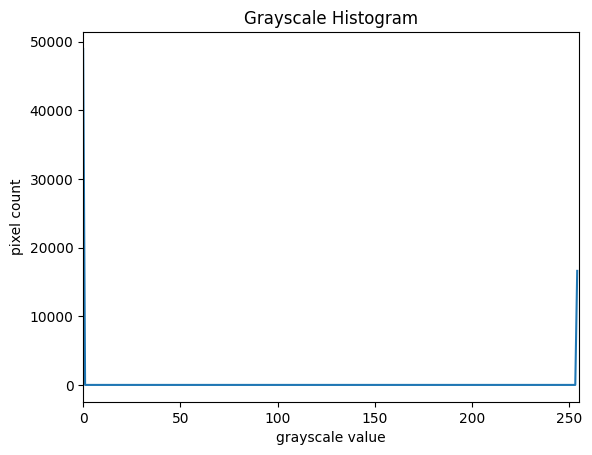

In [59]:
show_histogram(thres_image_1)

## Umbralización Otsu - Objects

In [60]:
thres_value_2, thres_image_2 = cv2.threshold(objects_image, 0, 100, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

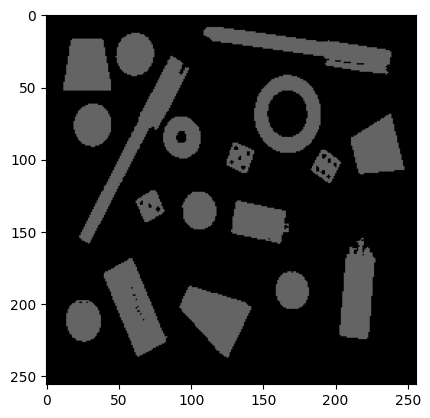

In [61]:
plt.imshow(thres_image_2, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.05

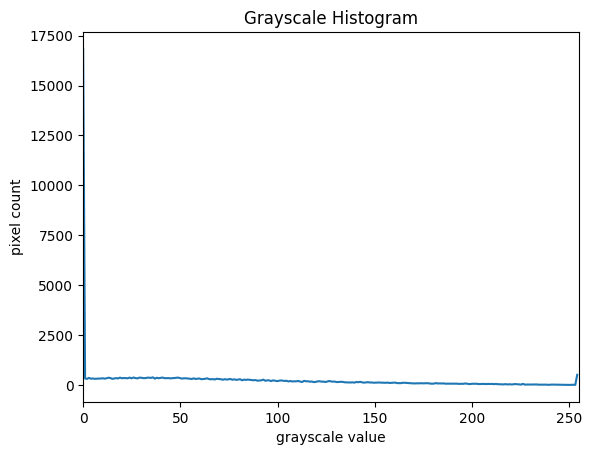

In [62]:
noised_image_var_1 = random_noise(objects_image, mode='gaussian', mean=0, var=0.05)
noised_image = noised_image_var_1 * 255
show_histogram(noised_image)

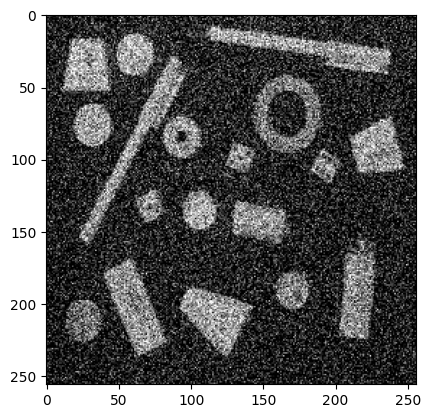

In [63]:
plt.imshow(noised_image, cmap='gray', vmin=0, vmax=255)

## Adición de ruido - Varianza 0.001 

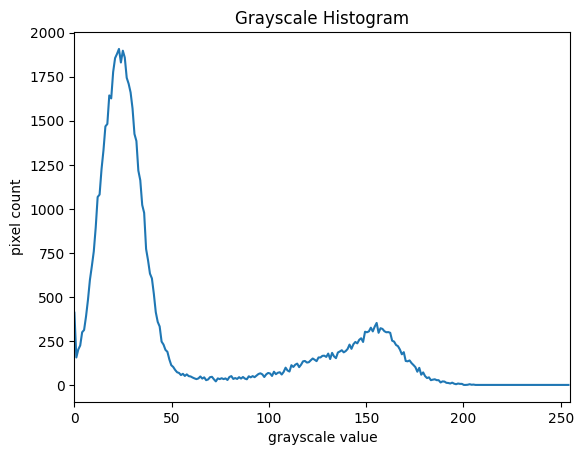

In [64]:
noised_image_var_2 = random_noise(objects_image, mode='gaussian', mean=0, var=0.001)
noised_image_2 = noised_image_var_2 * 255
show_histogram(noised_image_2)

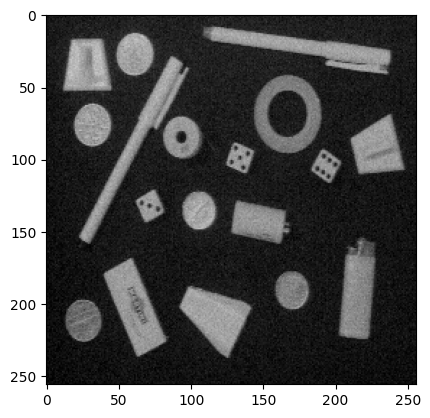

In [65]:
plt.imshow(noised_image_2, cmap='gray', vmin=0, vmax=255)

### *¿Qué sucede? ¿Por qué sucede esto?*

// Respuesta

## Umbralizaciones sobre las imagenes generadas con ruido

### Umbralizaciones globales

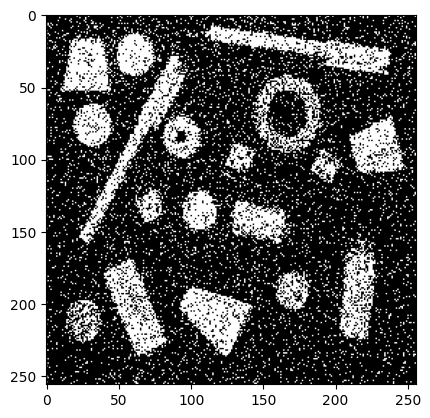

In [ ]:
thres_value_3, thres_image_3 = cv2.threshold(noised_image, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_3, cmap='gray', vmin=0, vmax=255)

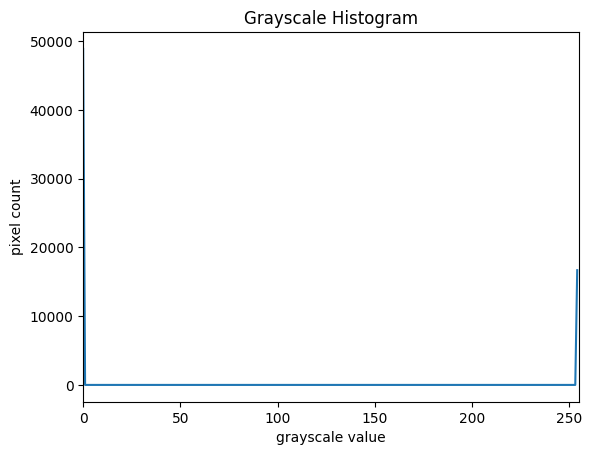

In [67]:
show_histogram(thres_image_3)

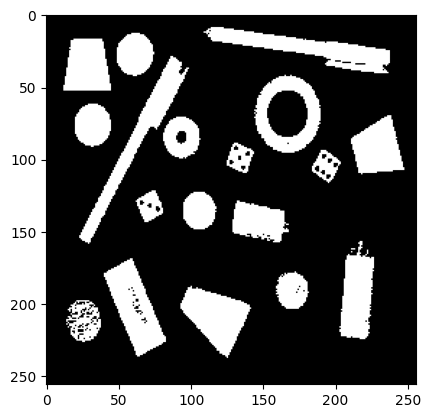

In [69]:
thres_value_4, thres_image_4 = cv2.threshold(noised_image_2, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thres_image_4, cmap='gray', vmin=0, vmax=255)

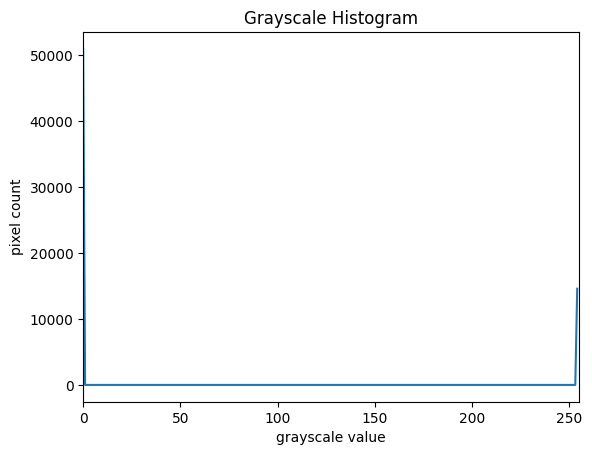

In [70]:
show_histogram(thres_image_4)

### Umbralizaciones otsu

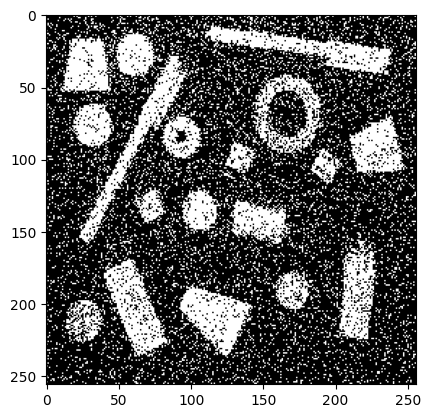

In [78]:
thres_value_5, thres_image_5 = cv2.threshold(noised_image.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_5, cmap='gray', vmin=0, vmax=255)

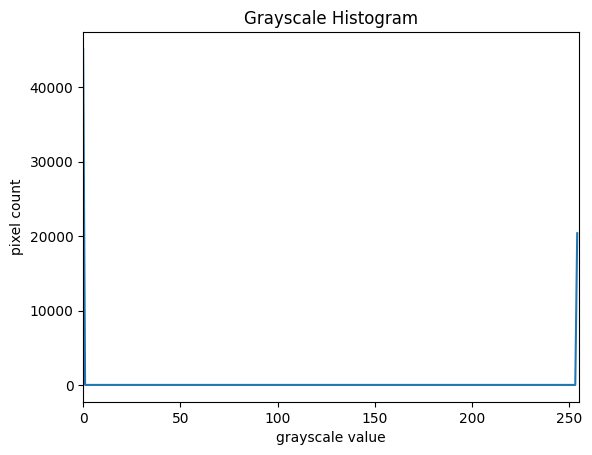

In [79]:
show_histogram(thres_image_5)

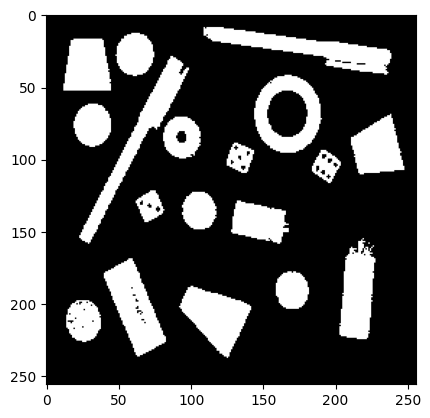

In [80]:
thres_value_6, thres_image_6 = cv2.threshold(noised_image_2.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_6, cmap='gray', vmin=0, vmax=255)

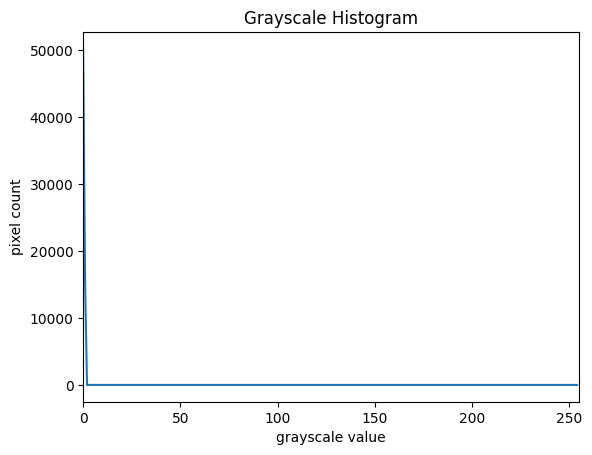

In [ ]:
show_histogram(thres_image_6)

### ¿Cómo afecta el ruido al resultado? 

## Cargar imagen TEXT

In [84]:
imagen_text = cv2.imread('images/TEXT.png', cv2.IMREAD_GRAYSCALE)

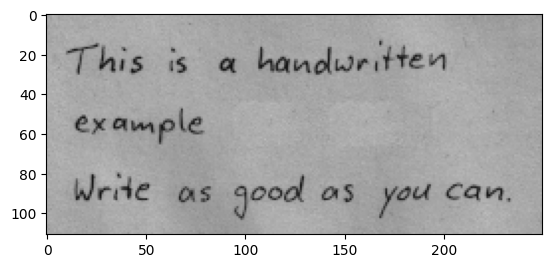

In [85]:
plt.imshow(imagen_text, cmap='gray', vmin=0, vmax=255)

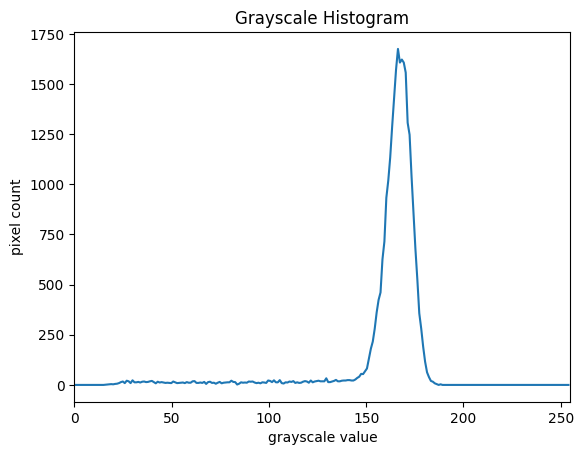

In [86]:
show_histogram(imagen_text)

## Sombra Circular Lateral

In [111]:
rows, cols = imagen_text.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
#Cálculo del centro
cx, cy = cols // 2, rows // 2  
#Cálculo del radio y distancia posible
distance = np.sqrt((x - cx) ** 2 + (y - cy) ** 2)
max_dist = np.sqrt(cx**2 + cy**2) 

#Aplicación del gradiente
text_shading = 1 - (distance / max_dist)  
text_image_som = imagen_text * text_shading
text_image_som = text_image_som.astype(np.uint8)

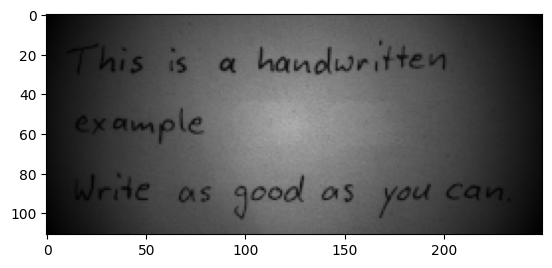

In [112]:
plt.imshow(text_image_som, cmap='gray', vmin=0, vmax=255)

## Sombras sinusoidales

In [ ]:
# Cantidad de perturbaciones
frequency = 20  
#Intensidad de los picos
amplitude = 0.5

#Cálculo y aplicación del efecto
sinusoidal_shading = (1 + amplitude * np.sin(2 * np.pi * x / frequency)) / 1.5
sinusoidal_image = imagen_text * sinusoidal_shading

sinusoidal_image = sinusoidal_image.astype(np.uint8)

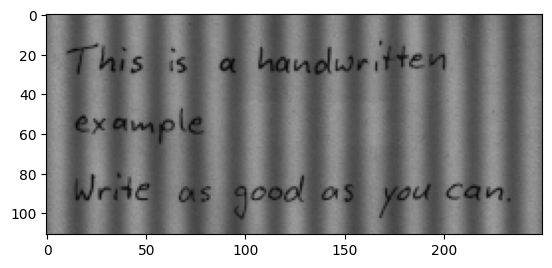

In [110]:
plt.imshow(sinusoidal_image, cmap='gray', vmin=0, vmax=255)

## Umbralización Otsu

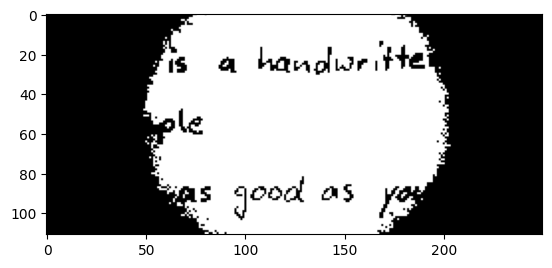

In [113]:
thres_value_7, thres_image_7 = cv2.threshold(text_image_som, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_7, cmap='gray', vmin=0, vmax=255)

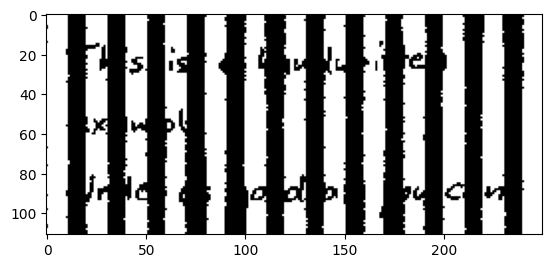

In [114]:
thres_value_8, thres_image_8 = cv2.threshold(sinusoidal_image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_8, cmap='gray', vmin=0, vmax=255)

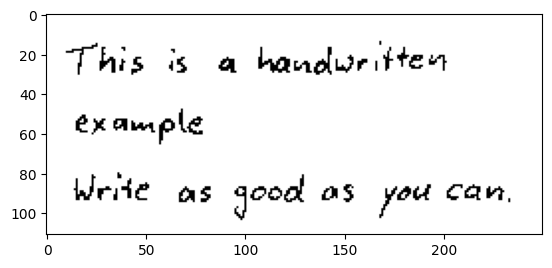

In [116]:
thres_value_10, thres_image_10 = cv2.threshold(imagen_text, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres_image_10, cmap='gray', vmin=0, vmax=255)

### ¿Qué sucede? ¿Por qué sucede esto? ¿Qué alternativas puede emplear para mitigar este resultado?

## Umbralización local

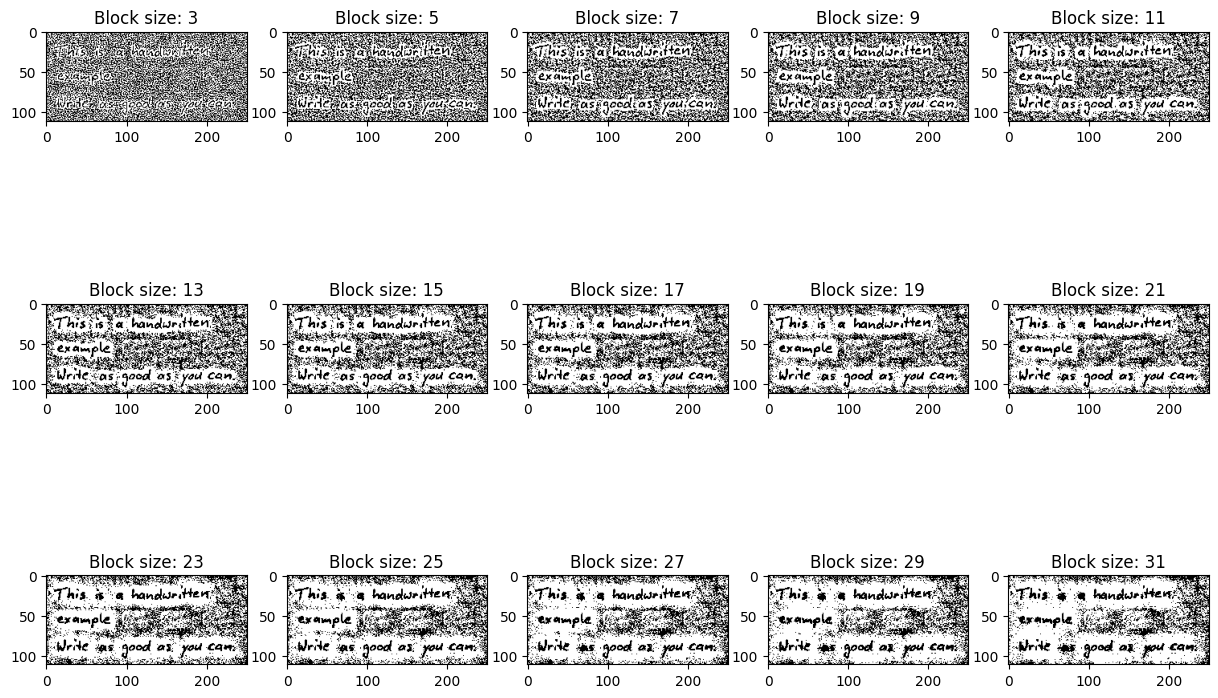

In [127]:
block_size = 21
block_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
threshold_list = []
for block_size in block_list:
  ti = threshold_local(imagen_text, block_size=block_size, method='mean')
  binary_image = imagen_text > ti
  thresholded_image = binary_image*255
  threshold_list.append(thresholded_image)

fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.ravel()
for i, ax in enumerate(axs.flat):
  ax.imshow(threshold_list[i], cmap='gray', vmin=0, vmax=255)
  ax.set_title(f'Block size: {block_list[i]}')
  

### ¿En qué cambia el resultado con relación al método de Otsu? ¿Qué implicaciones tiene esto? ¿Cómo puede mejorar el resultado de la segmentación para reducir el ruido en ambos casos?